# Skeleton of Assignment 4 for Extra Credit:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn (extra credit)
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import random
import datetime as dt

#imports downloader
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
# s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
# pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
datestring = '201501'
getCitiBikeCSV(datestring)

df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df1['date'] = pd.to_datetime(df1['starttime'])


('Downloading', '201501')
file in place, you can continue


In [3]:
datestring = '201507'
getCitiBikeCSV(datestring)

df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2['date'] = pd.to_datetime(df2['starttime'])

('Downloading', '201507')
file in place, you can continue


In [4]:
df1.shape

(285552, 16)

In [5]:
df2.shape

(1085676, 16)

In [6]:
df3 = pd.concat([df1,df2])
df3=df3.reset_index()
#df3=df3.drop(df['index'], axis=1, inplace=True)
df3.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [7]:
df3= df3.drop('index', axis=1)
df3.shape

(1371228, 16)

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [8]:
df3.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

# **H0: there is no statistical difference in age between ridership departing Manhattan and Brooklyn**

$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [9]:
#dropping some data I no longer need
#... your code here...

df3=df3.drop(['starttime','stoptime', 'gender', 'end station latitude', 'end station latitude', 'end station longitude',  'start station name', 'end station name'],axis=1)
df3.head(1)

,tripduration,start station id,start station latitude,start station longitude,end station id,bikeid,usertype,birth year,date
0,1346,455,40.75002,-73.969053,265,18660,Subscriber,1960.0,2015-01-01 00:01:00


In [10]:
df3['age'] = 2015 - df3['birth year'][(df3['usertype'] == 'Subscriber')]
df3.head(1)

,tripduration,start station id,start station latitude,start station longitude,end station id,bikeid,usertype,birth year,date,age
0,1346,455,40.75002,-73.969053,265,18660,Subscriber,1960.0,2015-01-01 00:01:00,55.0


## I will split the areas into Manhattan, Brooklyn, Queens, Bronx and Staten based on the latitude and longitude information (https://www.latlong.net/).

In [11]:
Staten = df3['start station longitude']<-74.044780
Brooklyn = (df3['start station longitude']>-74.044780) & (df3['start station latitude']<40.699876)
Bronx = df3['start station latitude']<40.800270
Queens = (df3['start station longitude']>-74.044780) & (df3['start station latitude']>40.699876)\
& (df3['start station latitude']<40.800270)& (df3['start station longitude']>-73.946477)
Manhattan = (df3['start station longitude']>-74.044780) & (df3['start station latitude']>40.699876)\
& (df3['start station latitude']<40.800270)& (df3['start station longitude']<-73.946477)

# print(count(Staten),count(Brooklyn),count(Bronx),count(Queens),count(Manhattan))
# print(Brooklyn.count)

df3_Brooklyn=df3.loc[Brooklyn]
df3_Manhattan=df3.loc[Manhattan]

print(df3_Brooklyn.shape)
print(df3_Manhattan.shape)


df3_Brooklyn['age'].dropna(inplace= True)
df3_Manhattan['age'].dropna(inplace= True)

(64764, 10)
(1306464, 10)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/series.py:2571: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


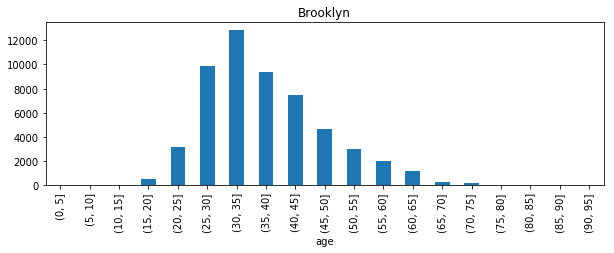

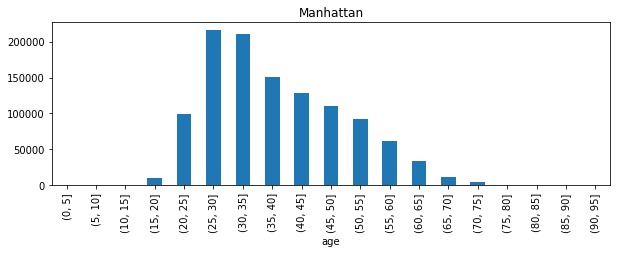

In [12]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(0, 100, 5)
axM = df3_Brooklyn.age.groupby(pd.cut(df3_Brooklyn.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False,figsize=(10, 3))
axM.set_title("Brooklyn")
axF = df3_Manhattan.age.groupby(pd.cut(df3_Manhattan.age, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False,figsize=(10, 3))
axF.set_title("Manhattan");


**Figure 1: histogrammed distribution of riders' age in Brooklyn and Manhattan **
The histogram shows that age in Manhattan is younger than that of Brooklyn.

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
age                    
(0, 5]         0.000000
(5, 10]        0.000000
(10, 15]       0.000000
(15, 20]       0.000957
(20, 25]       0.028307
(25, 30]       0.039197
(30, 35]       0.008943
(35, 40]       0.047438
(40, 45]       0.070699
(45, 50]       0.057198
(50, 55]       0.030262
(55, 60]       0.013119
(60, 65]       0.004717
(65, 70]       0.000189
(70, 75]       0.000483
(75, 80]       0.000199
(80, 85]       0.000028
(85, 90]       0.000018
(90, 95]       0.000000


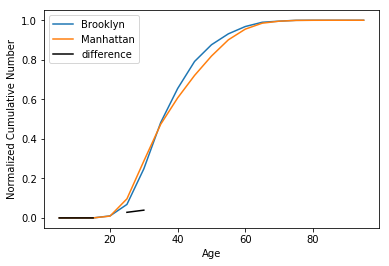

In [13]:
#print df.ageS, df.ageS.cumsum()

csM=df3_Brooklyn.age.groupby(pd.cut(df3_Brooklyn.age, bins)).agg([count_nonzero]).cumsum()

csF=df3_Manhattan.age.groupby(pd.cut(df3_Manhattan.age, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "Brooklyn")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "Manhattan")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender** 
This histogram shows that daytime trip tends to be shorter than nighttime trip. That means we could see the significant difference when we test.

lets run the scipy KS test

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [14]:
ks = scipy.stats.ks_2samp(df3_Brooklyn.age, df3_Manhattan.age)
print (ks)


Ks_2sampResult(statistic=0.09431076366424378, pvalue=0.0)


## your words here!...

## Answer
### Kolmogorov-Smirnov test (2 samples) checks whether the two samples come from the same distribution. In terms of null hypothesis, we can reject a null hypothesis if the KS value is high and p-value is lower than significant level.
### Here, we got p-value less than 0.05. Our significant level is p = 0.05. Therefore, we can reject the null hypothesis.



## For extra credit
I will try the same test with 200 size

In [15]:
import random
# I don't know why, but I have to set 'import ranodm' here to run the codes below.
# If I set it in the begging of the file, it does not work.

random.seed(0)
Brooklyn200 = random.sample(df3_Brooklyn.age, 200)
Manhattan200 = random.sample(df3_Manhattan.age, 200)

In [16]:
ks2 = scipy.stats.ks_2samp(Brooklyn200, Manhattan200)
print (ks2)

Ks_2sampResult(statistic=0.09000000000000001, pvalue=0.37665913494839609)


### Now, I got different values. I can not reject the null hypothesis. This happens because the sample size 200 is too small to use KS test.

# Now retest using a test for correlation. 

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
...

But make sure you understand how to use it! there is an option "replace" which you should think about.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



## I would say that there are several approaches to test correlation between Brooklyn and Manhattan ridership. So, the answer should not be only one. Here, I use dummy variables (Brooklyn dummy and Manhattan dummy) and test the correlation between dummy and age. This surely answers the question although this approach does not need to set size and sort.

In [17]:
# We already have a dummy. 'Brookly' and 'Manhattan'.

#df3['dummy'] = (df3['date'].dt.hour>6) & (df3['date'].dt.hour<18 )
# ind2=(df3['date'].dt.hour<6) |(df3['date'].dt.hour>18 )


df3['Brooklyn_dummy'] = (df3['start station longitude']>-74.044780) & (df3['start station latitude']<40.699876)
df3['Manhattan_dummy'] = (df3['start station longitude']>-74.044780) & (df3['start station latitude']>40.699876)\
& (df3['start station latitude']<40.800270)& (df3['start station longitude']<-73.946477)

df3.head(1)

,tripduration,start station id,start station latitude,start station longitude,end station id,bikeid,usertype,birth year,date,age,Brooklyn_dummy,Manhattan_dummy
0,1346,455,40.75002,-73.969053,265,18660,Subscriber,1960.0,2015-01-01 00:01:00,55.0,False,True


In [18]:
df3.dropna(subset=['age'],inplace=True)
scipy.stats.pearsonr(df3['Brooklyn_dummy'], df3['age'])


(-0.01549169924119677, 7.9261397346593726e-64)

In [19]:
scipy.stats.pearsonr(df3['Manhattan_dummy'], df3['age'])


(0.015491699241196779, 7.9261397346593726e-64)

## Answer
### Null hypothesis 
H0 = There is no correlation between age and origin (Brooklyn and Manhattan).

### Pearson's test checks correlation coefficient and the p-value for testing non-correlation. we can reject a null hypothesis if the p-value is lower than significant level. 
### Here, we got p-value less than 0.05. Our significant level is p = 0.05. Therefore, we can reject the null hypothesis.


# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [20]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

scipy.stats.spearmanr(df3['Brooklyn_dummy'], df3['age'], axis=0)


SpearmanrResult(correlation=-0.0075097345847594124, pvalue=2.9380692929640179e-16)

In [21]:
scipy.stats.spearmanr(df3['Manhattan_dummy'], df3['age'], axis=0)


SpearmanrResult(correlation=0.0075097345847594124, pvalue=2.9380692929640179e-16)

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

### Answer
### Spearman's test checks correlation coefficient and the p-value for testing non-correlation. we can reject a null hypothesis if the p-value is lower than significant level. 
### Here, we got p-value less than 0.05. Our significant level is p = 0.05. Therefore, we can reject the null hypothesis.